In [1]:
import pandas as pd
import nltk

In [2]:
df = pd.read_csv('fashion.csv')
df.head()

,year,season,brand,author of review,location,time,review text
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ..."
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...


In [3]:
#columns in the table 
df.columns

Index(['year ', 'season', 'brand', 'author of review', 'location', 'time',
       'review text'],
      dtype='object')

In [4]:
# extracting the review we are going to analyze
reviews = df['review text']


In [5]:
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.corpus import stopwords
from textblob import TextBlob

## Method 1: Counting the pos and neg words in the reviews

In [6]:
#filtering null
def IsNotNull(value):
    return value is not None and len(value) > 0

In [7]:
# create dictionary list (prositive)
dict_p = []
f = open('positive-words.txt', 'r')   
for line in f:
   t = line.strip().lower()
   if (IsNotNull(t)):
      dict_p.append(t)
f.close()

In [8]:
dict_p[:4]

['a+', 'abound', 'abounds', 'abundance']

In [9]:
# create dictionary list (negative)
dict_n = []
f = open('negative-words.txt', 'r',encoding="ISO-8859-1")   
for line in f:
   t = line.strip().lower()
   if (IsNotNull(t)):
      dict_n.append(t)
f.close()

In [10]:
dict_n[:4]

['2-faced', '2-faces', 'abnormal', 'abolish']

In [11]:
# count of positive and negative words that appeared in each message
# net count which is calculated by positive count subtracting negative count. 

poscnt = []
negcnt = []
netcnt = []

for n in reviews:
    
    text = n.lower()
    qa = 0
    qb = 0

    for word in dict_p :
        if (word in text) :
            qa = qa + 1

    for word in dict_n :
        if (word in text) :
            qb = qb + 1

    qc = qa - qb
    
    poscnt.append(qa)
    negcnt.append(qb)
    netcnt.append(qc)


In [12]:
df['positive_1'] = poscnt
df['negative_1'] = negcnt
df['neutral_1'] = netcnt

In [13]:
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,16,12,4
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,14,18,-4
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,22,25,-3
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",11,26,-15
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,14,20,-6


In [14]:
## Method two： SentimentIntensityAnalyzer from NLTK

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Vader 
review_sent = []
sid = SentimentIntensityAnalyzer()
for sentence in reviews:
    ss = sid.polarity_scores(sentence)
    #print(ss)
    review_sent.append(ss)

In [16]:
df2 = pd.DataFrame(data=review_sent)
df2.columns

Index(['compound', 'neg', 'neu', 'pos'], dtype='object')

In [17]:
df['positive_2'] = df2['pos']
df['negative_2'] = df2['neg']
df['neutral_2'] = df2['neu']
df['compound'] = df2['compound']

In [18]:
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738


## Method 3 : Textblob 

In [19]:
sent_score = []
for i in reviews:
    blob = TextBlob(i)
    #print(blob.sentiment)
    sent_score.append(blob.sentiment)

In [20]:
df3 = pd.DataFrame(data=sent_score)
df3.head()

,polarity,subjectivity
0,0.176518,0.506270
1,0.134861,0.473283
2,0.178247,0.466122
3,0.068447,0.383085
4,0.249673,0.593464


In [21]:
df['polarity'] = df3['polarity']
df['subjectivity'] = df3['subjectivity']

In [22]:
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625,0.176518,0.506270
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378,0.134861,0.473283
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842,0.178247,0.466122
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373,0.068447,0.383085
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738,0.249673,0.593464


In [47]:
id_ = list(range(1,df.shape[0]+1))
df_task3 = df[['positive_1','negative_1','neutral_1']]
df_task3['ID']=id_
df_task3 = df_task3[['ID','positive_1','negative_1','neutral_1']]
df_task3.to_csv('sentiment_output.csv')

/Users/marcowang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Analyzing Part

In [23]:
# Converting the time into datetime format for further analyze
df.time = df['time'].astype('datetime64[ns]')
df.head()

,year,season,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,2015-09-13,Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625,0.176518,0.506270
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,2015-10-01,You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378,0.134861,0.473283
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,2015-09-21,August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842,0.178247,0.466122
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,2015-10-03,"They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373,0.068447,0.383085
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,2015-10-21,Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738,0.249673,0.593464


In [24]:
set(list(df['year '])),set(list(df['season'])) # Droppping this useless info

({2016}, {'Spring'})

In [25]:
df = df.drop('season',axis =1) 

In [26]:
df = df.drop('year ',axis =1)

In [27]:
df.head()

,brand,author of review,location,time,review text,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
0,A Dtacher,Kristin Anderson,NEW YORK,2015-09-13,Detachment was the word of the day at A Dtache...,16,12,4,0.105,0.012,0.883,0.9625,0.176518,0.506270
1,A.F. Vandevorst,Luke Leitch,PARIS,2015-10-01,You heard this collection coming long before y...,14,18,-4,0.059,0.052,0.889,0.4378,0.134861,0.473283
2,A.L.C.,Kristin Anderson,NEW YORK,2015-09-21,August saw the announcement of big news for A....,22,25,-3,0.122,0.006,0.872,0.9842,0.178247,0.466122
3,A.P.C.,Nicole Phelps,PARIS,2015-10-03,"They call me the king of basics, Jean Touitou ...",11,26,-15,0.100,0.054,0.846,0.9373,0.068447,0.383085
4,A.W.A.K.E.,Maya Singer,NEW YORK,2015-10-21,Natalia Alaverdian is a designer with a lot of...,14,20,-6,0.116,0.017,0.866,0.9738,0.249673,0.593464


/Users/marcowang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


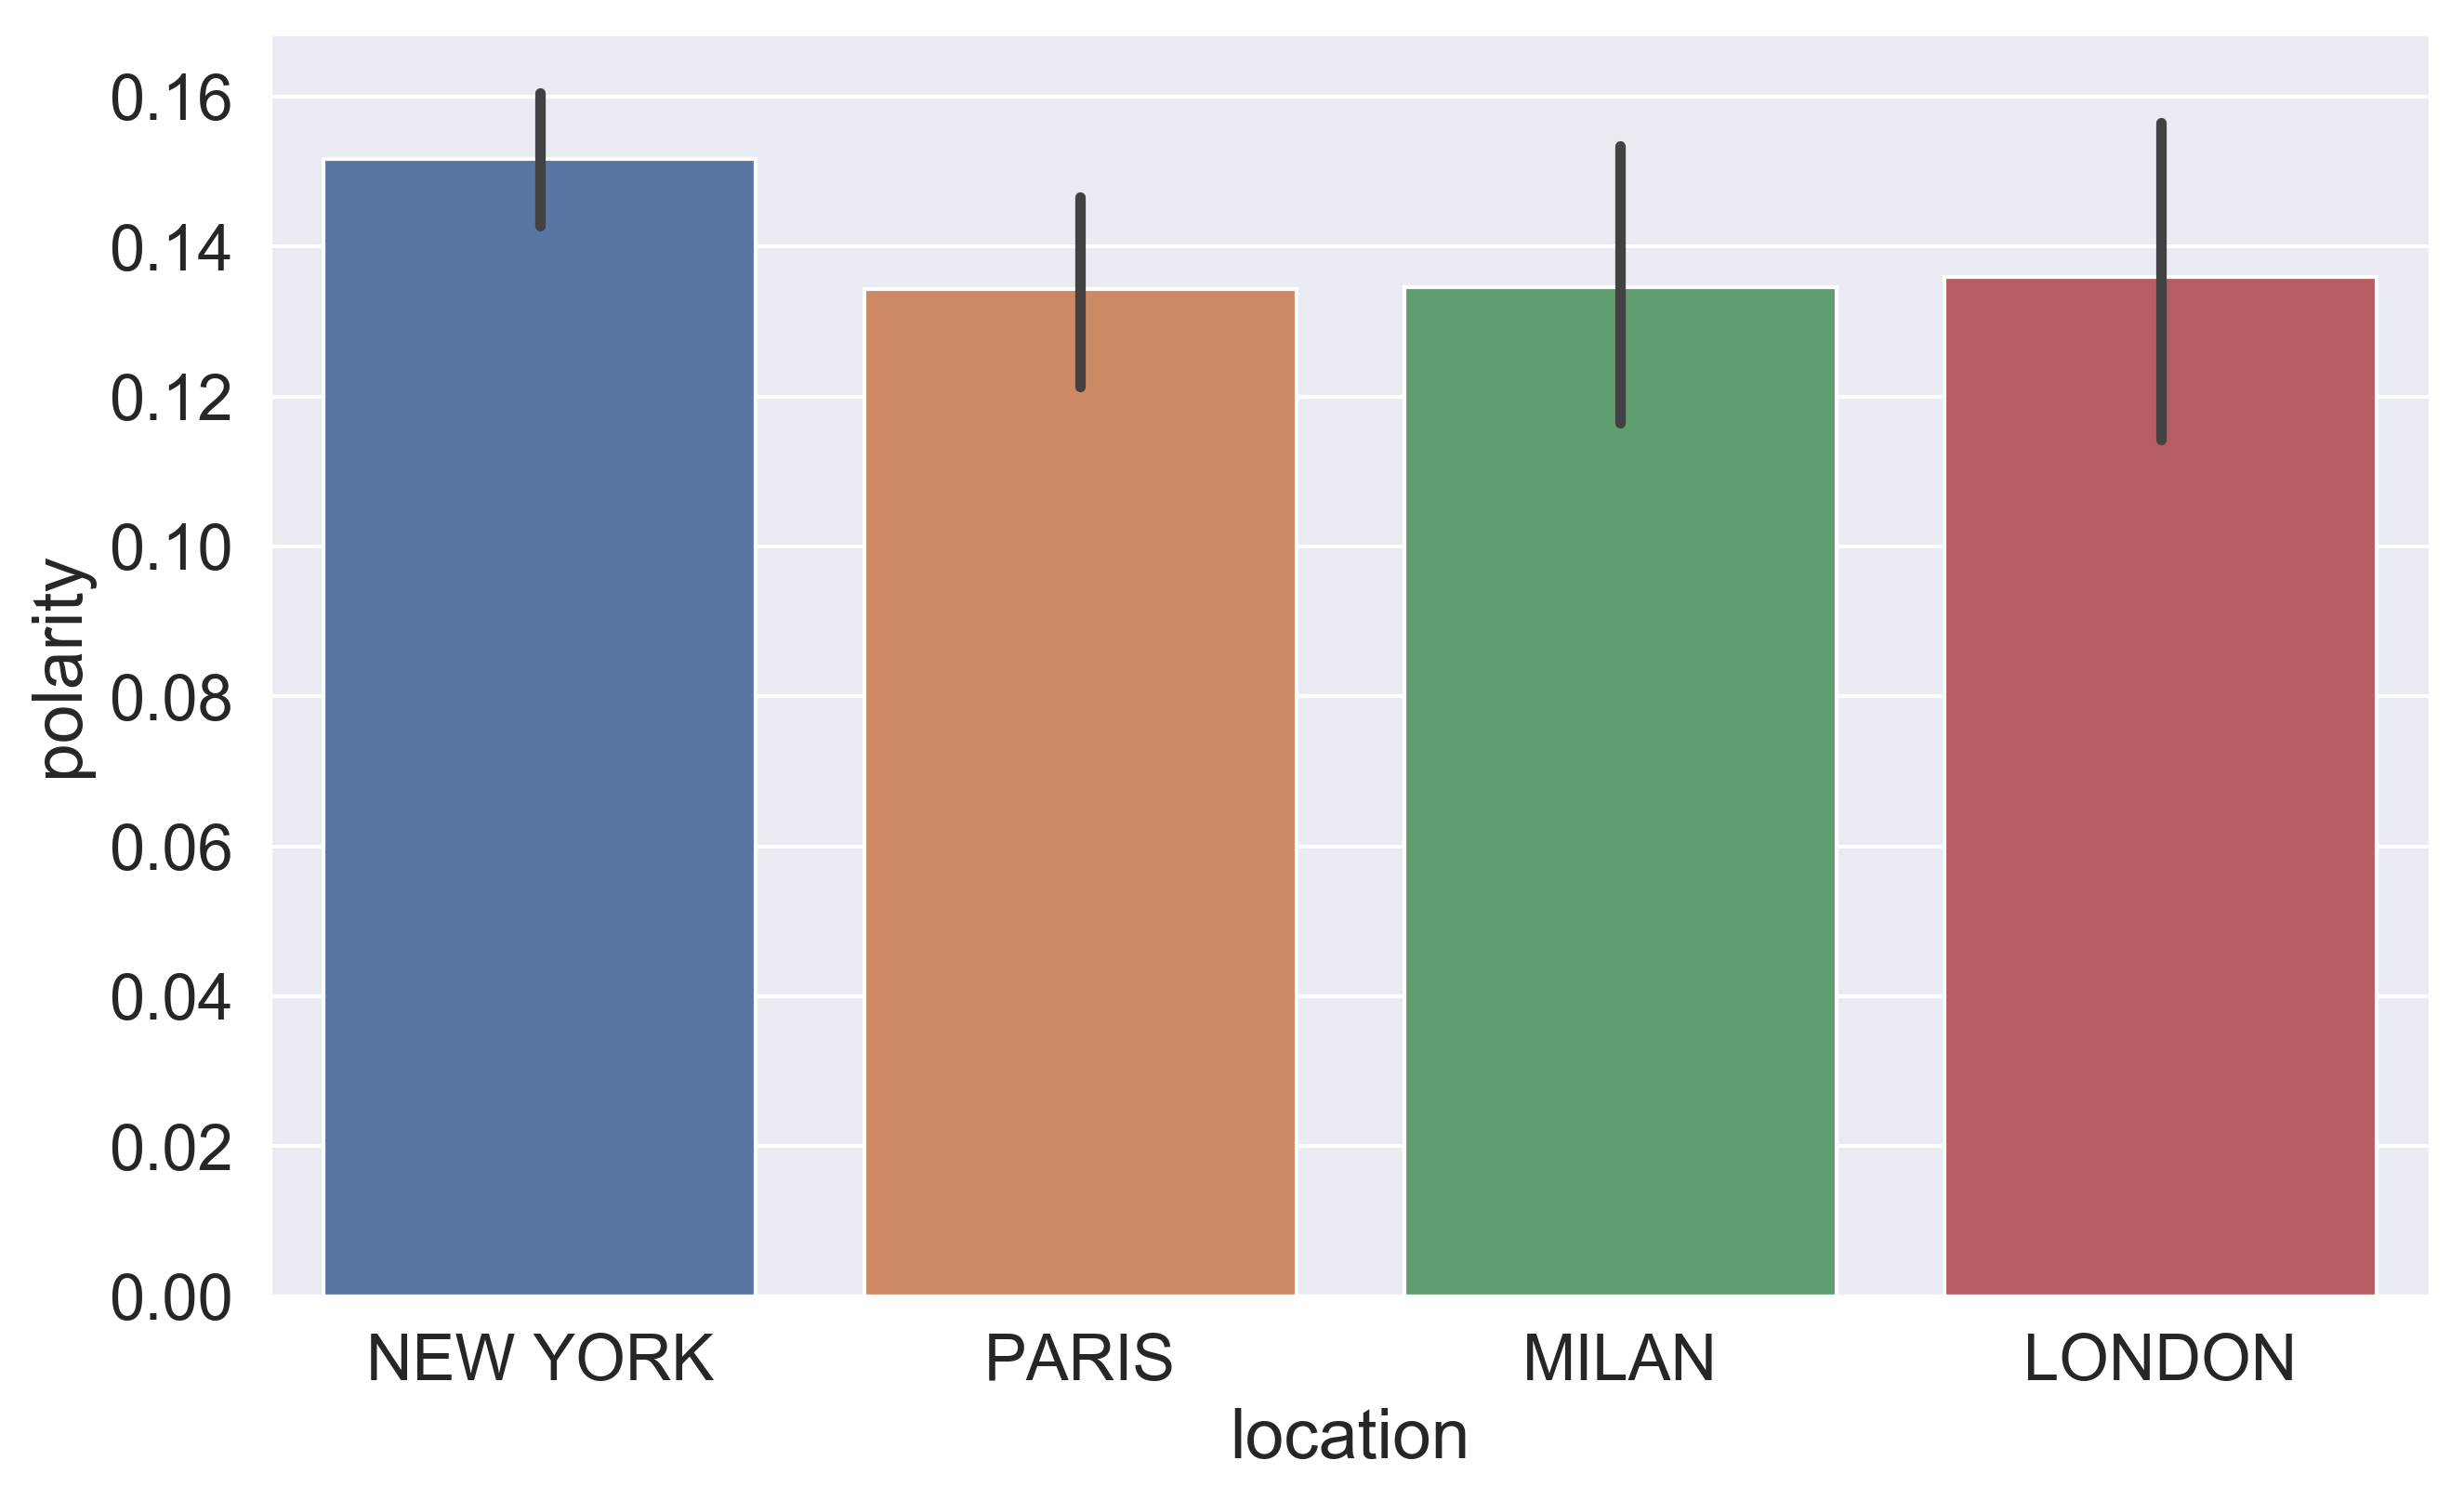

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set_style('ticks')
sent_by_location = df.groupby(['location']).mean()
plt.figure(figsize=(10,6),dpi = 300)
sns.set(font_scale=1.5)
_ = sns.barplot(data= df,x = 'location',y = 'polarity')


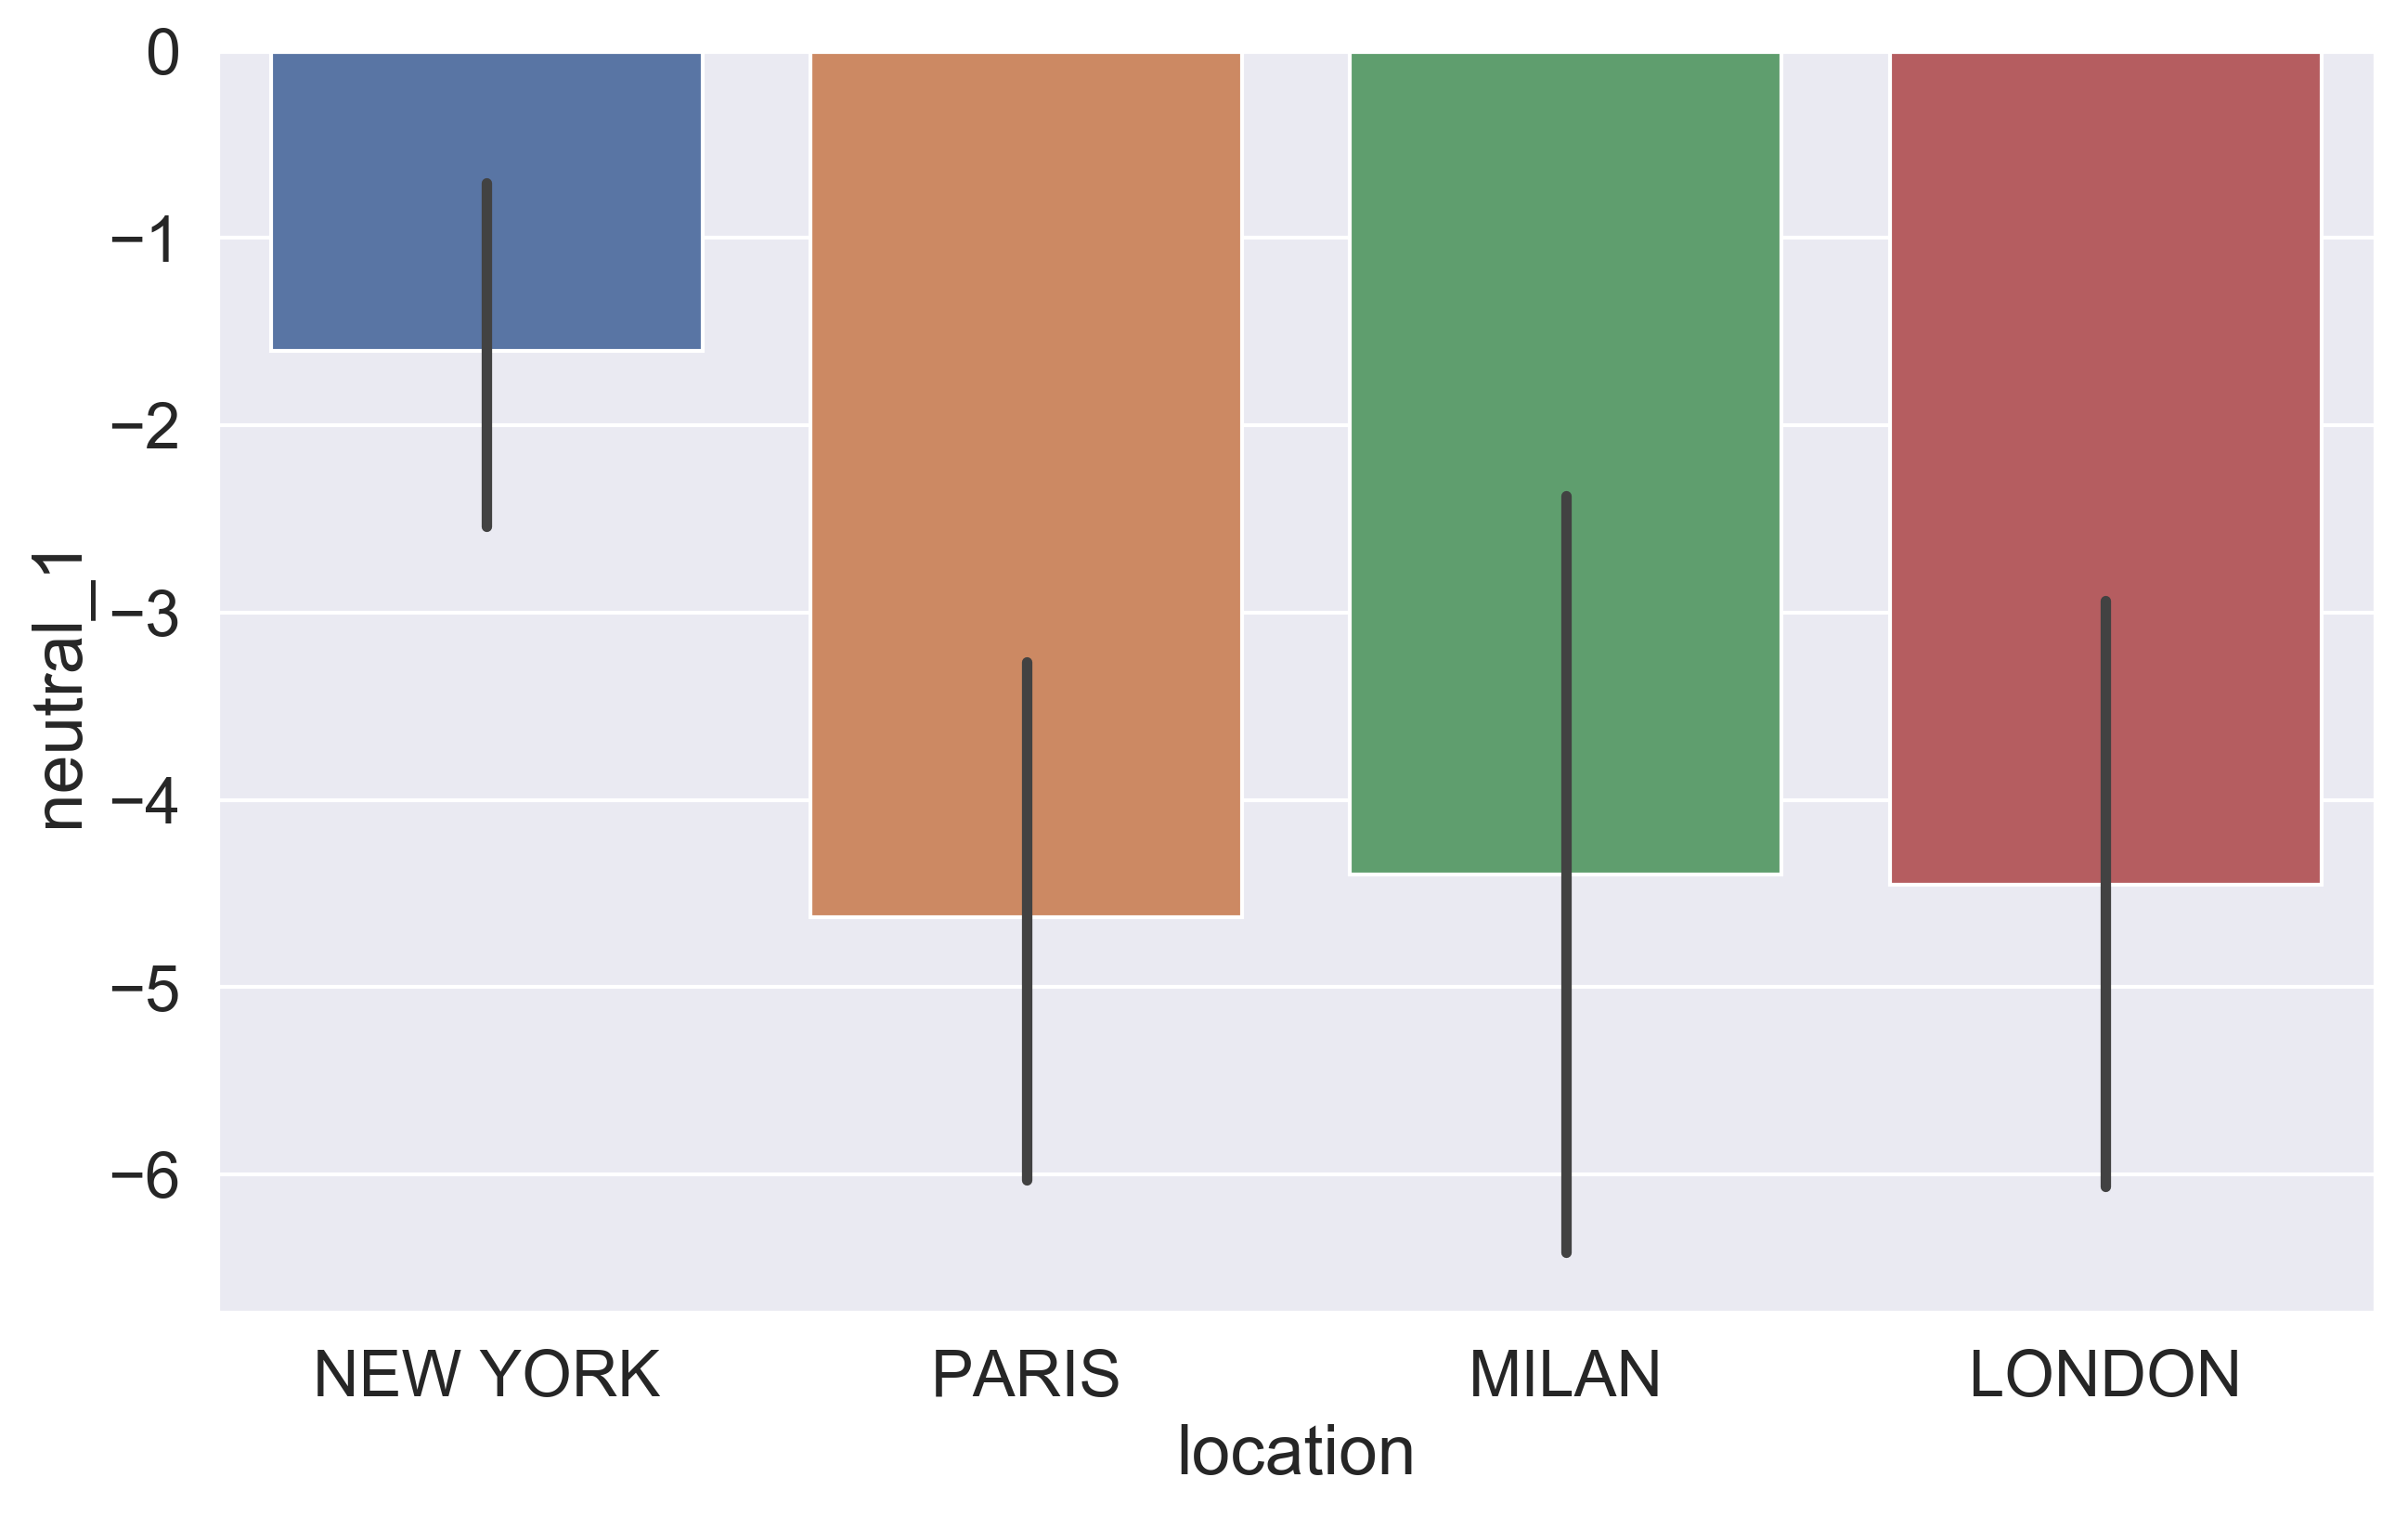

In [29]:
sns.set_style('ticks')
sent_by_location = df.groupby(['location']).mean()
plt.figure(figsize=(10,6),dpi = 300)
sns.set(font_scale=1.5)
_ = sns.barplot(data= df,x = 'location',y = 'neutral_1')


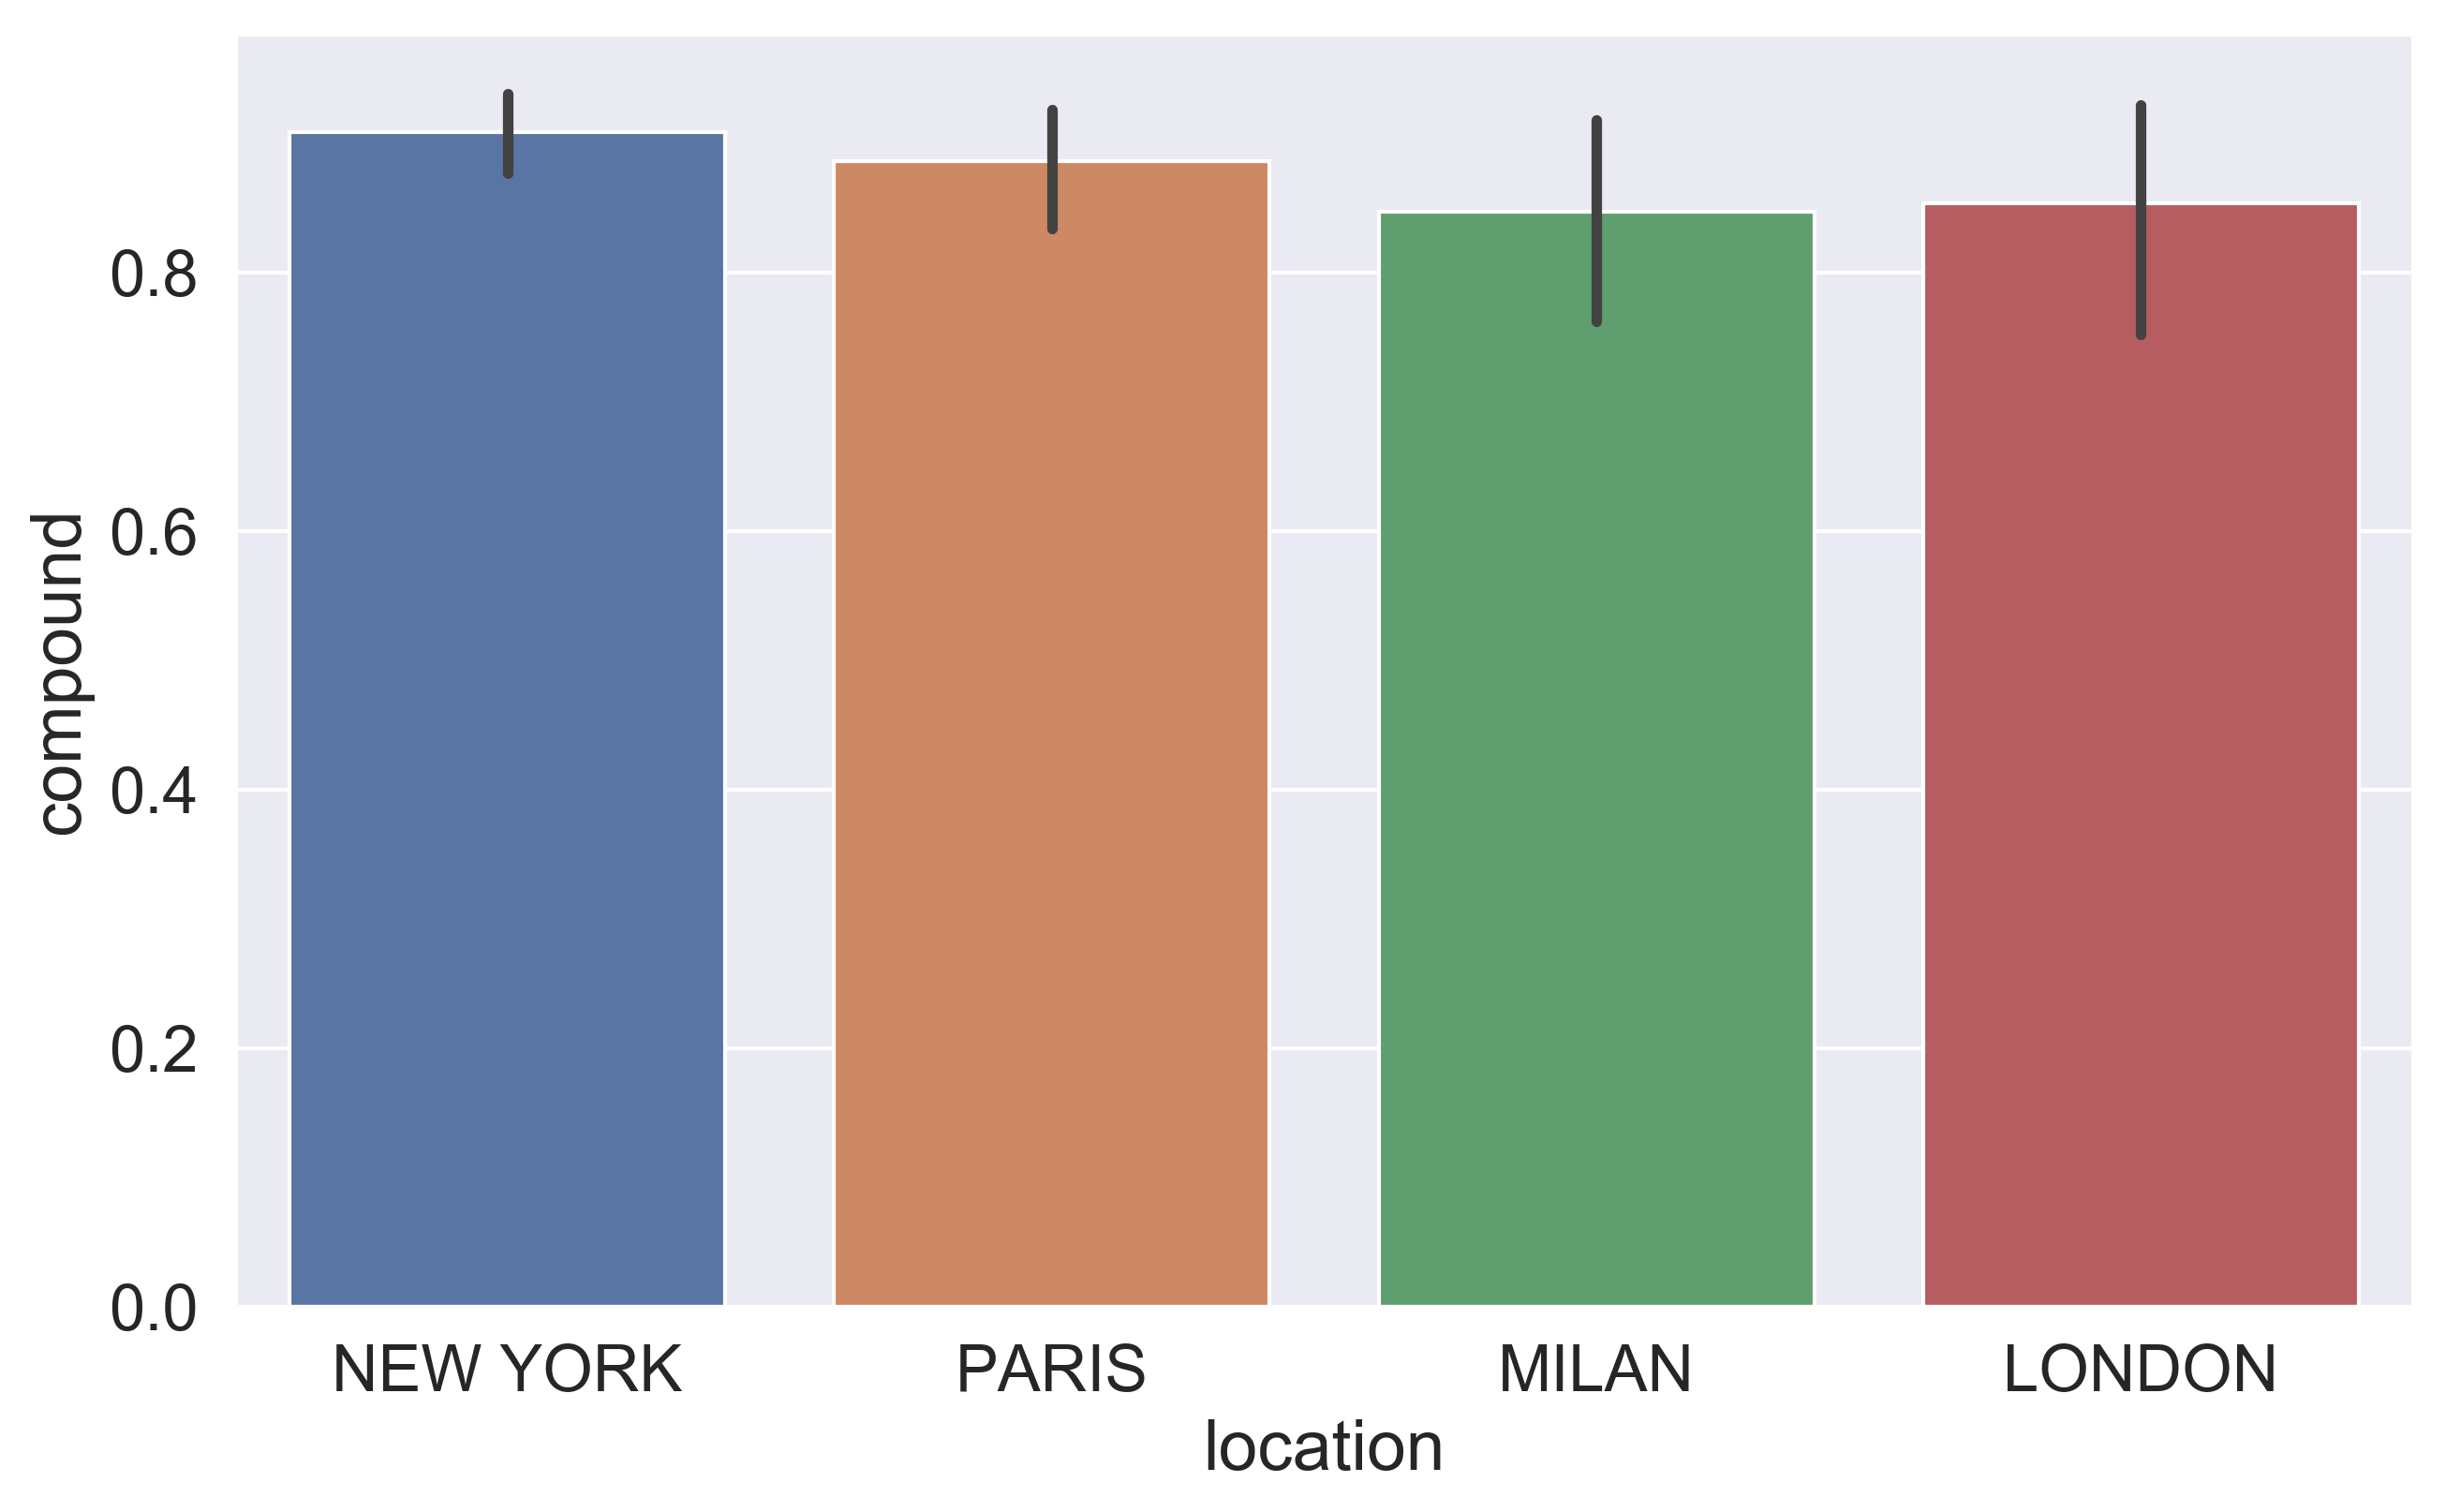

In [30]:
sns.set_style('ticks')
sent_by_location = df.groupby(['location']).mean()
plt.figure(figsize=(10,6),dpi = 300)
sns.set(font_scale=1.5)
_ = sns.barplot(data= df,x = 'location',y = 'compound')
_.figure.savefig('polarity_by_location.png')

## From the graph we could find that NY is the best in general speaking!

In [31]:
sent_by_location


,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity
location,,,,,,,,,
LONDON,18.677419,23.129032,-4.451613,0.101484,0.029726,0.868855,0.853624,0.135992,0.496022
MILAN,19.207547,23.603774,-4.396226,0.106019,0.031792,0.862113,0.846585,0.134584,0.459840
NEW YORK,18.483254,20.086124,-1.602871,0.112818,0.021287,0.865900,0.908633,0.151715,0.466952
PARIS,19.190909,23.818182,-4.627273,0.103264,0.027318,0.869436,0.886355,0.134372,0.466143


In [32]:
sent_by_brand = df.groupby(['brand']).mean()
sent_by_brand_count = df.groupby(['brand']).count()
sent_by_brand['number_reviews'] = sent_by_brand_count['author of review']

In [33]:
sent_by_brand.sort_values('number_reviews').head()

,positive_1,negative_1,neutral_1,positive_2,negative_2,neutral_2,compound,polarity,subjectivity,number_reviews
brand,,,,,,,,,,
1205,10,17,-7,0.086,0.024,0.890,0.8831,0.064933,0.541516,1
Osklen,22,21,1,0.173,0.038,0.789,0.9950,0.097396,0.417329,1
Oscar de la Renta,34,29,5,0.097,0.020,0.883,0.9876,0.127586,0.426100,1
Orley,15,19,-4,0.099,0.025,0.876,0.9767,0.099147,0.456887,1
Orla Kiely,14,19,-5,0.123,0.057,0.820,0.9565,0.072115,0.459402,1


### It seems that every brand got only one review, thus we tend to find insightful knowledges based on location.
### For simplisity, we tend to use polarity for our sentiment analysis.


In [34]:
df_ana = df[['time','location','polarity','subjectivity']]
df_location_reform = pd.pivot_table(df_ana,values=['polarity'],columns=['location'], index=['time'],fill_value=0 )
df_location_reform.head()

polarity                      
location     LONDON MILAN  NEW YORK PARIS
time                                     
2015-09-08      0.0   0.0  0.120751   0.0
2015-09-09      0.0   0.0  0.138341   0.0
2015-09-10      0.0   0.0  0.155668   0.0
2015-09-11      0.0   0.0  0.167124   0.0
2015-09-12      0.0   0.0  0.159422   0.0

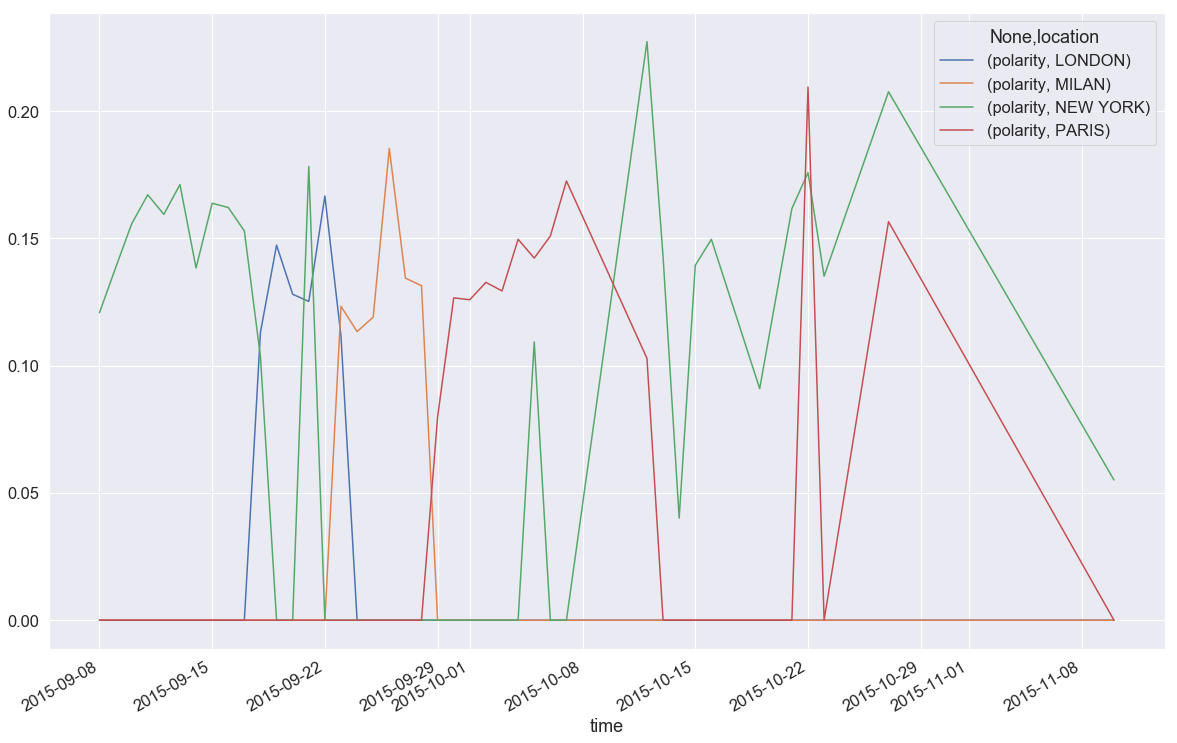

In [35]:
df_location_reform.plot(figsize=(20,13),)

In [36]:
df_location_reform['london']= df_location_reform.iloc[:,0].rolling(window=3,center=False).mean()
df_location_reform['milan']=df_location_reform.iloc[:,1].rolling(window=3,center=False).mean()
df_location_reform['new_york']=df_location_reform.iloc[:,2].rolling(window=3,center=False).mean()
df_location_reform['paris']=df_location_reform.iloc[:,3].rolling(window=3,center=False).mean()

In [37]:
df_location_reform['time'] = df_location_reform.index 

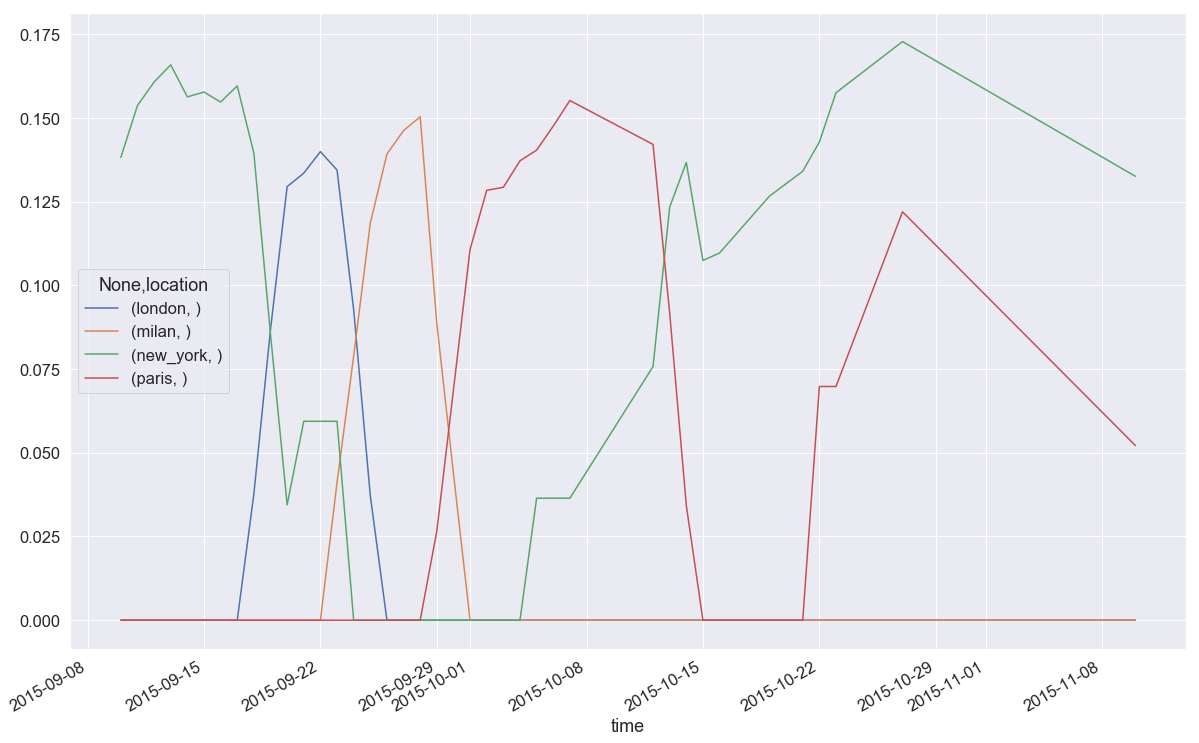

In [38]:
df_location_reform.plot(x='time', y=['london','milan','new_york','paris'],figsize=(20,13))
plt.show()